# Non-interacting band structure

In [1]:
%matplotlib inline
import numpy as np
from quant_met import plotting
from quant_met import hamiltonians

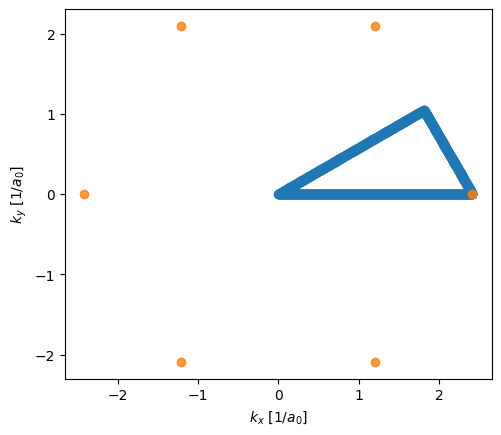

In [2]:
lattice_constant = np.sqrt(3)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

Gamma = np.array([0, 0])
M = np.pi / lattice_constant * np.array([1, 1 / np.sqrt(3)])
K = 4 * np.pi / (3 * lattice_constant) * np.array([1, 0])

points = [(M, 'M'), (Gamma, r'\Gamma'), (all_K_points[1], 'K')]

band_path, band_path_plot, ticks, labels = plotting.generate_bz_path(points, number_of_points=1000)

k = np.array([0., 0.])

BZ_path_plot = plotting.scatter_into_bz(all_K_points, band_path)

egx_h = hamiltonians.EGXHamiltonian(t_gr=1, t_x=0.01, V=0.1, a=lattice_constant, mu=-2.5, U_gr=1, U_x=1)

band_structure = egx_h.calculate_bandstructure(band_path, overlaps=(np.array([0, 0, 1]), np.array([1, 0, 0])))

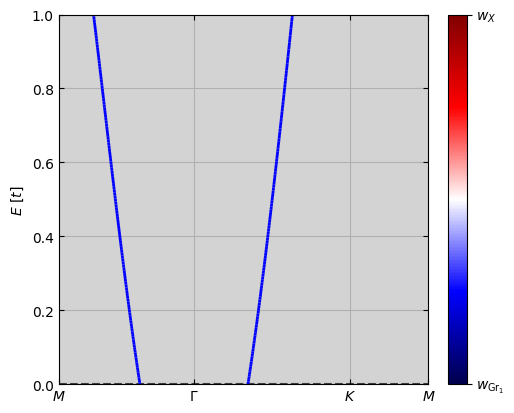

In [3]:
fig = plotting.plot_bandstructure(
    bands=band_structure[['band_0', 'band_1', 'band_2']].to_numpy().T,
    overlaps=band_structure[['wx_0', 'wx_1', 'wx_2']].to_numpy().T,
    overlap_labels=[r"$w_{\mathrm{Gr}_1}$", r"$w_X$"],
    k_point_list=band_path_plot,
    labels=labels,
    ticks=ticks
)